In [35]:
import SimpleITK as sitk
import numpy as np
from utils.io import read_image, write_image
import matplotlib.pyplot as plt

In [2]:
image = read_image("/../mnt/c/Users/zzirg/Downloads/Day10-05 zstack-Airyscan Processing.tif")

In [3]:
arr = sitk.GetArrayFromImage(image)

In [4]:
arr.shape

(61, 1000, 1000, 3)

## Visualize data

In [5]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

In [6]:
def plot_histograms(image, bins=100):
    """
    Plot histograms of all three channels of a 3D array on a single plot.

    Parameters:
        image (np.ndarray): 3D array with shape (H, W, C), where C = 3 (channels).
        bins (int): Number of bins for the histograms.
    """
    plt.figure(figsize=(10, 6))
    colors = ['red', 'green', 'blue']  # Colors for each channel
    labels = ['Channel 0', 'Channel 1', 'Channel 2']  # Labels for each channel

    for i in range(3):
        _ = plt.hist(image[..., i].ravel(), bins=bins, color=colors[i], alpha=0.6, label=labels[i])

    plt.title("Histograms of Channels")
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


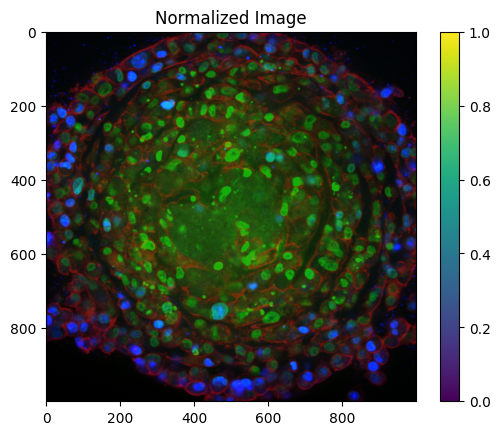

In [29]:
index = 42
normalized_arr = arr[index].copy()
for channel in range(3):
    normalized_arr[..., channel] = np.clip(normalized_arr[..., channel], 0, np.quantile(normalized_arr[..., channel], 0.99))
normalized_arr = normalized_arr / normalized_arr.max()

# Display the normalized image
plt.imshow(normalized_arr)
plt.colorbar()
plt.title("Normalized Image")
plt.show()

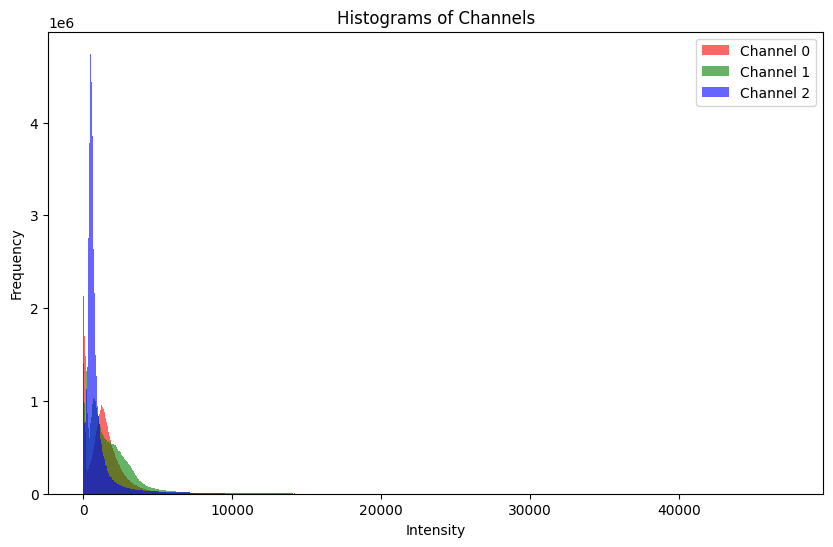

In [8]:
plot_histograms(arr, bins=1000)

In [9]:
def interactive_slicer(image, axis=0):
    """
    Create an interactive slicer for a 3D image.
    
    Parameters:
        image (np.ndarray): 3D image data.
        axis (int): Axis to slice along (0, 1, or 2).
    """
    def view_slice(idx):
        plt.figure(figsize=(8, 8))
        if axis == 0:
            plt.imshow(image[idx, :, :], cmap="gray")
        elif axis == 1:
            plt.imshow(image[:, idx, :], cmap="gray")
        elif axis == 2:
            plt.imshow(image[:, :, idx], cmap="gray")
        else:
            raise ValueError("Invalid axis! Use 0, 1, or 2.")
        plt.title(f"Slice {idx} along axis {axis}")
        plt.colorbar()
        plt.show()
    
    interact(view_slice, idx=widgets.IntSlider(min=0, max=image.shape[axis]-1, step=1, value=image.shape[axis]//2))

In [10]:
# Example Usage
interactive_slicer(arr[..., 1], axis=0)  # Scroll along the Z-axis

interactive(children=(IntSlider(value=30, description='idx', max=60), Output()), _dom_classes=('widget-interac…

## Normalize data

In [11]:
from utils.norm import normalize_radial_intensity_3d
# basically it only works for G-channel

In [12]:
normalized_channel = normalize_radial_intensity_3d(arr[..., 1])

In [15]:
def interactive_slicer(image1, image2, axis=0):
    """
    Create an interactive slicer to compare two 3D images side by side.
    
    Parameters:
        image1 (np.ndarray): First 3D image data.
        image2 (np.ndarray): Second 3D image data.
        axis (int): Axis to slice along (0, 1, or 2).
    """
    def view_slice(idx):
        plt.figure(figsize=(16, 8))
        
        # Slice and show the first image
        plt.subplot(1, 2, 1)
        if axis == 0:
            plt.imshow(image1[idx, :, :], cmap="gray")
        elif axis == 1:
            plt.imshow(image1[:, idx, :], cmap="gray")
        elif axis == 2:
            plt.imshow(image1[:, :, idx], cmap="gray")
        else:
            raise ValueError("Invalid axis! Use 0, 1, or 2.")
        plt.title(f"Image 1 - Slice {idx} along axis {axis}")
        plt.colorbar()
        
        # Slice and show the second image
        plt.subplot(1, 2, 2)
        if axis == 0:
            plt.imshow(image2[idx, :, :], cmap="gray")
        elif axis == 1:
            plt.imshow(image2[:, idx, :], cmap="gray")
        elif axis == 2:
            plt.imshow(image2[:, :, idx], cmap="gray")
        else:
            raise ValueError("Invalid axis! Use 0, 1, or 2.")
        plt.title(f"Image 2 - Slice {idx} along axis {axis}")
        plt.colorbar()
        
        plt.show()
    
    max_slices = min(image1.shape[axis], image2.shape[axis]) - 1
    interact(view_slice, idx=widgets.IntSlider(min=0, max=max_slices, step=1, value=max_slices // 2))


In [16]:
interactive_slicer(normalized_channel, arr[..., 1])

interactive(children=(IntSlider(value=30, description='idx', max=60), Output()), _dom_classes=('widget-interac…

## Polar coordinates visualization

In [17]:
from utils.viz import cartesian_to_polar_transform_3d

In [23]:
polar = cartesian_to_polar_transform_3d(arr, (500, 500), (707, 3600))

In [30]:
polar.shape

(61, 707, 3600, 3)

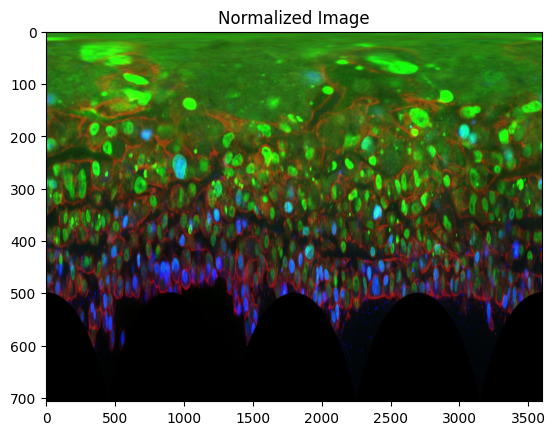

In [34]:
index = 42
normalized_arr = polar[index].copy()
for channel in range(3):
    normalized_arr[..., channel] = np.clip(normalized_arr[..., channel], 0, np.quantile(normalized_arr[..., channel], 0.99))
normalized_arr = normalized_arr / normalized_arr.max()

# Display the normalized image
plt.imshow(normalized_arr, aspect='auto')
plt.title("Normalized Image")
plt.show()

In [38]:
write_image(sitk.GetImageFromArray(polar), "polar.nrrd")